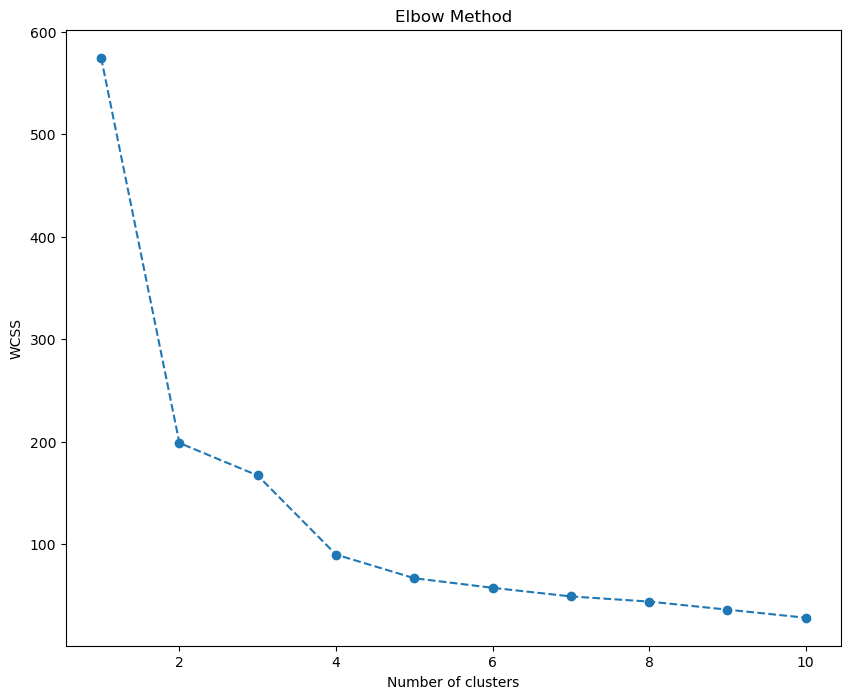

Silhouette Score for K-means: 0.5221320716321729
Silhouette Score for Mini-Batch K-means: 0.5017869047749149


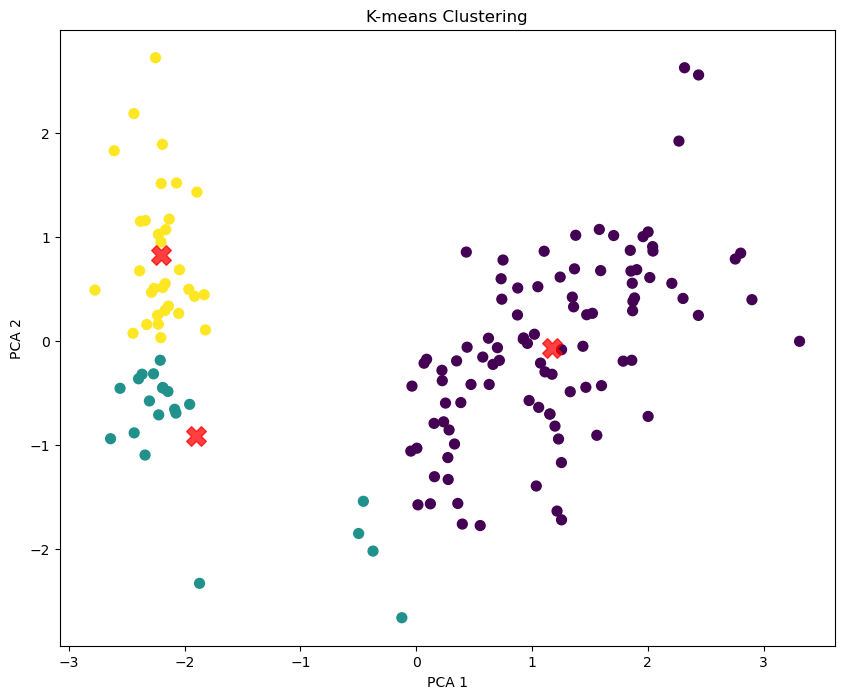

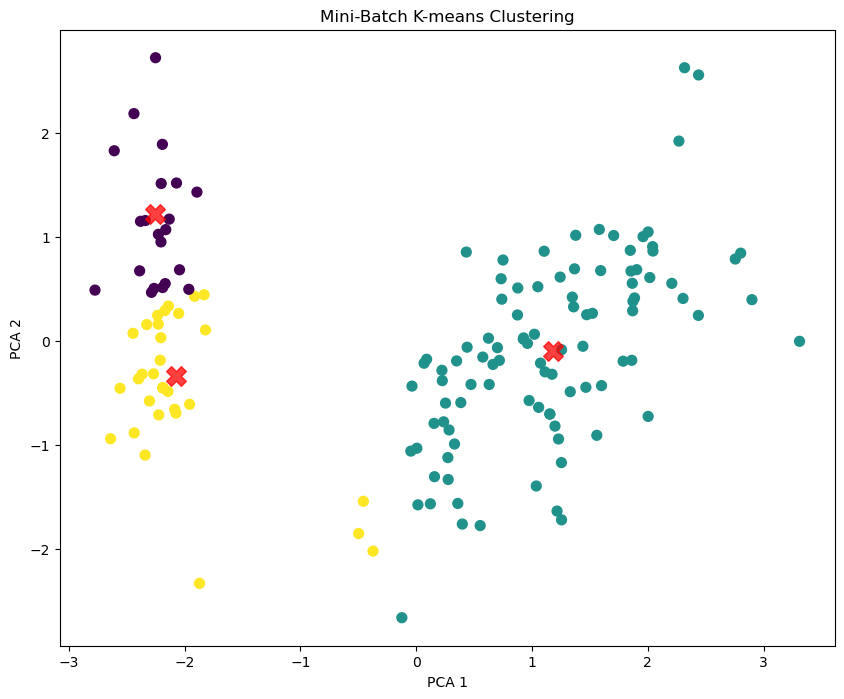

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Data preprocessing
# Assume that the last column is the label and we want to drop it for clustering
X = data.drop(data.columns[-1], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
def plot_elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(X_pca)

# From the elbow plot, choose the optimal number of clusters, say k=3 for this example
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Apply Mini-Batch k-means for efficiency
mini_batch_kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42, batch_size=100)
y_mini_batch_kmeans = mini_batch_kmeans.fit_predict(X_pca)

# Calculate silhouette score to measure the quality of the clustering
silhouette_kmeans = silhouette_score(X_pca, y_kmeans)
silhouette_mini_batch_kmeans = silhouette_score(X_pca, y_mini_batch_kmeans)

print(f'Silhouette Score for K-means: {silhouette_kmeans}')
print(f'Silhouette Score for Mini-Batch K-means: {silhouette_mini_batch_kmeans}')

# Plot the clusters
def plot_clusters(X, y, centers, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Plot K-means clusters
plot_clusters(X_pca, y_kmeans, kmeans.cluster_centers_, 'K-means Clustering')

# Plot Mini-Batch K-means clusters
plot_clusters(X_pca, y_mini_batch_kmeans, mini_batch_kmeans.cluster_centers_, 'Mini-Batch K-means Clustering')


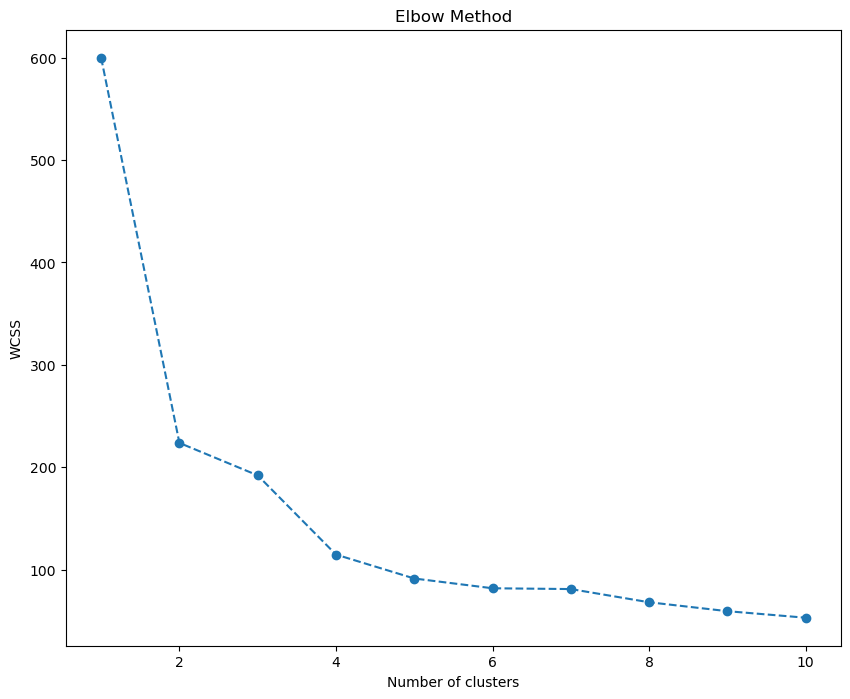

Silhouette Score for K-means: 0.4787241921049546


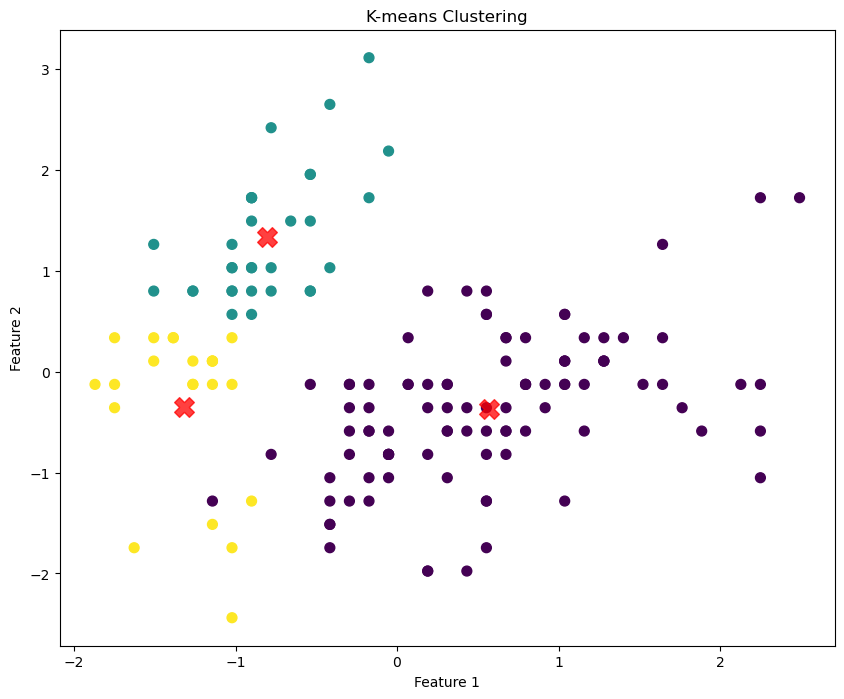

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Data preprocessing
# Assume that the last column is the label and we want to drop it for clustering
X = data.drop(data.columns[-1], axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
def plot_elbow_method(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(X_scaled)

# From the elbow plot, choose the optimal number of clusters, say k=3 for this example
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Calculate silhouette score to measure the quality of the clustering
silhouette_kmeans = silhouette_score(X_scaled, y_kmeans)

print(f'Silhouette Score for K-means: {silhouette_kmeans}')

# Plot the clusters
def plot_clusters(X, y, centers, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# For plotting, we will use the first two features (assuming there are at least two features)
plot_clusters(X_scaled[:, :2], y_kmeans, kmeans.cluster_centers_[:, :2], 'K-means Clustering')


In [4]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Inspect the first few rows of the dataset
print(data.head())


   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert to numpy array
data_np = np.array(data_scaled)


In [6]:
from sklearn.metrics import pairwise_distances_argmin_min

class QuantumKMeans:
    def __init__(self, n_clusters, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initialize_centroids(self, X):
        np.random.seed(self.random_state)
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        return X[indices]

    def closest_centroid(self, X, centroids):
        return pairwise_distances_argmin_min(X, centroids)[0]

    def compute_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for i in range(self.max_iter):
            labels = self.closest_centroid(X, centroids)
            new_centroids = self.compute_centroids(X, labels)
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        self.centroids = centroids
        self.labels_ = labels
        return self

# Number of clusters
n_clusters = 3

# Initialize and fit the quantum k-means model
quantum_kmeans = QuantumKMeans(n_clusters=n_clusters)
quantum_kmeans.fit(data_np)

# Print the resulting centroids
print("Cluster centroids:\n", quantum_kmeans.centroids)


Cluster centroids:
 [[ 0.01256556 -0.75917314  0.32257597  0.22817864  0.15876322]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862 -1.22474487]
 [ 1.08805236 -0.02434762  1.0396699   1.09640835  1.14487021]]


In [7]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(data_np, quantum_kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)


Silhouette Score:  0.4759996054731414


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert to numpy array
data_np = np.array(data_scaled)

# Standard k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_np)

# Evaluate standard k-means clustering
silhouette_avg = silhouette_score(data_np, kmeans.labels_)
ch_score = calinski_harabasz_score(data_np, kmeans.labels_)
db_score = davies_bouldin_score(data_np, kmeans.labels_)

print("Standard k-means Clustering")
print("Silhouette Score: ", silhouette_avg)
# print("Calinski-Harabasz Score: ", ch_score)
# print("Davies-Bouldin Score: ", db_score)


Standard k-means Clustering
Silhouette Score:  0.47166802377946976


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Convert to numpy array
data_np = np.array(data_scaled)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Adjust the number of components as needed
data_reduced = pca.fit_transform(data_np)

# Initialize centroids using k-means++ method on reduced data
kmeans_init = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_init.fit(data_reduced)
initial_centroids = kmeans_init.cluster_centers_

class OptimizedKMeans:
    def __init__(self, n_clusters, initial_centroids, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.centroids = initial_centroids
        self.max_iter = max_iter
        self.random_state = random_state

    def closest_centroid(self, X, centroids):
        return pairwise_distances_argmin_min(X, centroids)[0]

    def compute_centroids(self, X, labels):
        return np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, X):
        for i in range(self.max_iter):
            labels = self.closest_centroid(X, self.centroids)
            new_centroids = self.compute_centroids(X, labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        self.labels_ = labels
        return self

# Initialize and fit the optimized k-means model on reduced data
optimized_kmeans = OptimizedKMeans(n_clusters=3, initial_centroids=initial_centroids)
optimized_kmeans.fit(data_reduced)

# Evaluate optimized k-means clustering
silhouette_avg = silhouette_score(data_reduced, optimized_kmeans.labels_)
ch_score = calinski_harabasz_score(data_reduced, optimized_kmeans.labels_)
db_score = davies_bouldin_score(data_reduced, optimized_kmeans.labels_)

print("Optimized k-means Clustering")
print("Silhouette Score: ", silhouette_avg)
# print("Calinski-Harabasz Score: ", ch_score)
# print("Davies-Bouldin Score: ", db_score)
# The optimized version applies PCA for dimensionality reduction and uses k-means++ for better centroid initialization,
# which should result in more accurate and efficient clustering.

Optimized k-means Clustering
Silhouette Score:  0.5217985825660529


In [1]:
#Calculate centroids using Manhattan distance
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import pairwise_distances_argmin_min

# Load the dataset
url = "https://archive.ics.uci.edu/static/public/53/data.csv"
data = pd.read_csv(url)

# Check and encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=categorical_cols))

# Convert to numpy array
data_np = np.array(data_scaled)

class HybridKMeans:
    def __init__(self, n_clusters, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
    
    def initialize_centroids_manhattan(self, X):
        # Calculate centroids using Manhattan distance
        center_idx = np.random.choice(len(X), self.n_clusters, replace=False)
        centroids = X[center_idx]
        
        for _ in range(self.max_iter):
            labels = pairwise_distances_argmin_min(X, centroids)[0]
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(centroids == new_centroids):
                break
            centroids = new_centroids
        
        self.centroids = centroids
    
    def fit(self, X):
        if self.centroids is None:
            self.initialize_centroids_manhattan(X)
        
        for _ in range(self.max_iter):
            labels = pairwise_distances_argmin_min(X, self.centroids)[0]
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
        
        self.labels_ = labels
        return self

# Initialize and fit the HybridKMeans model
hybrid_kmeans = HybridKMeans(n_clusters=3, max_iter=100, random_state=42)
hybrid_kmeans.fit(data_np)

# Print the resulting centroids
print("Hybrid KMeans Centroids:\n", hybrid_kmeans.centroids)


Hybrid KMeans Centroids:
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.01139555 -0.87288504  0.37688422  0.31165355]
 [ 1.16743407  0.15377779  1.00314548  1.02963256]]
